# Use Google Books API to search for books online

In [1]:
# requests library is necessary for most interaction with the internet in Python
# time library will be used to pause the for loop between calls to avoid overloading the server
# csv library allows us to create a csv file
import requests
import time
import csv

In [2]:
#google books endpoint URL
books_url = 'https://www.googleapis.com/books/v1/volumes?'

In [3]:
#we don't need all the information in the results dictionary, so let's make a function which can extract the relevent data.

def parse_results(results):
    
    '''parse_results takes in the results variable (dictionary) as an argument and returns a list of dictionaries.
    Each dictionary within the list corresponds to a book and has an author key, title, key, publisher key, 
    and description key'''
    
    results_list = []

    for book in results['items']:

        title = book['volumeInfo']['title']

        # some books don't have authors, dates, or a description
        try:
            authors = ','.join(book['volumeInfo']['authors'])
        except:
            authors = 'NA'
        
        try:
            publisher = book['volumeInfo']['publisher']
        except:
            publisher = 'NA'

        try:
            description = book['volumeInfo']['description']
        except:
            description = "NA"

        results_dict = {'title': title,
                        'authors': authors,
                        'description': description,
                        'publisher': publisher}
        
        results_list.append(results_dict)
        
    return(results_list)

In [4]:
def make_csv(query, max_results):
    '''make_csv takes in two arguments, query (string) is what you want to search for, 
    max_results (integer) is the number of result you want to get'''
    
    #create a dictionary to pass into the get method
    parameters = {'q': query, 'maxResults': max_results, 'startIndex': 0}
    
    #make a get request to the API endpoint
    r = requests.get(books_url, params = parameters)
    
    #use the request object's json method to see the results
    results = r.json()

    #reassign results to only include the relevent data, using the function parse_results defined below
    results2 = parse_results(results)
    
    #create a for loop to collect the results into all_results
    all_results = []
    for i in range(5):
        print("collecting page " + str(i + 1))
        all_results.extend(results2)
        time.sleep(1) # very important to not overload API
        parameters['startIndex'] += parameters['maxResults']
    
    #write this data into a csv
    keys = all_results[0].keys()
    name = query + '_search.csv'
    with open(name, 'w') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(all_results)

In [5]:
make_csv('astrophysics', 20)

collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5


In [6]:
make_csv('astronomy', 20)

collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5


# Count words in description string of csv file

In [7]:
from string import punctuation

from collections import Counter

import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

import spacy

import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Jackie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Jackie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
def most_common_words(file_name, number_of_words):
    '''most_common_words takes in file_name (string) of a csv file with a descriptions column and 
    number_of_words (integer) the amount of most common words you want returned. It returns a list 
    of tuples containing a word and the number of times it appears'''
    
    file = pd.read_csv(file_name)
    
    descriptions = [str(file['description'][i]) for i in range(len(file))]
    all_descriptions = ''.join(descriptions)
    
    for char in punctuation:
        all_descriptions = all_descriptions.lower().replace(char, '')
    
    tokens = all_descriptions.split()
    no_stops = [word for word in tokens if word not in stopwords.words('english')]
    
    freq = Counter(no_stops)
    return freq.most_common(number_of_words)

In [9]:
most_common_words('astrophysics_search.csv', 30)

[('astrophysics', 135),
 ('astronomy', 115),
 ('physics', 85),
 ('book', 75),
 ('galaxies', 75),
 ('new', 70),
 ('students', 60),
 ('research', 50),
 ('topics', 50),
 ('universe', 45),
 ('stars', 45),
 ('energy', 45),
 ('solar', 40),
 ('space', 40),
 ('volume', 40),
 ('provides', 40),
 ('field', 40),
 ('cosmic', 35),
 ('structure', 35),
 ('introduction', 35),
 ('subject', 30),
 ('astronomical', 30),
 ('understanding', 30),
 ('system', 30),
 ('radiation', 30),
 ('stellar', 30),
 ('edition', 30),
 ('range', 30),
 ('•', 30),
 ('knowledge', 30)]

In [10]:
most_common_words('astronomy_search.csv', 30)

[('astronomy', 156),
 ('chapter', 155),
 ('appendix', 65),
 ('book', 55),
 ('planets', 55),
 ('stars', 45),
 ('universe', 35),
 ('astronomical', 35),
 ('solar', 35),
 ('science', 30),
 ('sky', 30),
 ('system', 30),
 ('galaxies', 30),
 ('work', 30),
 ('also', 30),
 ('life', 25),
 ('astronomers', 25),
 ('moon', 25),
 ('many', 20),
 ('help', 20),
 ('introductory', 20),
 ('students', 20),
 ('earth', 20),
 ('introduction', 20),
 ('space', 20),
 ('black', 20),
 ('holes', 20),
 ('physical', 20),
 ('history', 20),
 ('supernova', 20)]

# Bar plot of most common words

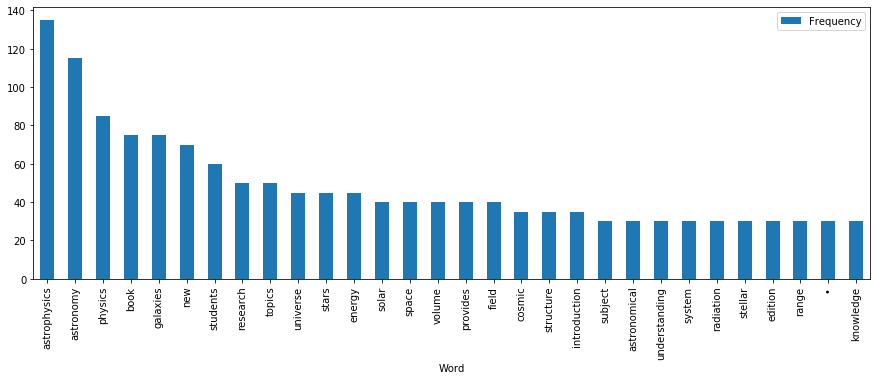

In [11]:
astrophysics = most_common_words('astrophysics_search.csv', 30)
astrophysics_df = pd.DataFrame(astrophysics, columns = ["Word", "Frequency"])
astrophysics_df.plot.bar(x = "Word", y = "Frequency", figsize = (15,5));

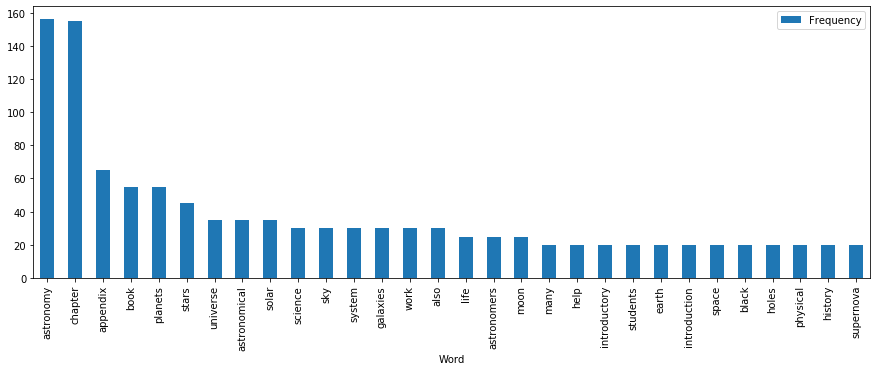

In [12]:
astronomy = most_common_words('astronomy_search.csv', 30)
astronomy_df = pd.DataFrame(astronomy, columns = ["Word", "Frequency"])
astronomy_df.plot.bar(x = "Word", y = "Frequency", figsize = (15,5));